# Pikaia: Genetic AI Examples

This notebook provides a set of examples demonstrating the use of the Pikaia library for genetic algorithms. Each example walks through loading data, setting up a population, configuring a model with different strategies, and visualizing the results.

## 0. Setup and Imports

First, let's import the necessary libraries. We'll need `numpy` for numerical operations, `matplotlib` for plotting, and the core components from our `pikaia` library.


In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import time

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from pikaia.data import PikaiaPopulation
from pikaia.models import PikaiaModel
from pikaia.plotting import PikaiaPlotter, PlotType
from pikaia.preprocessing import PikaiaPreprocessor, min_max_scaler
from pikaia.schemas import (
    FeatureType,
    GeneStrategyEnum,
    MixStrategyEnum,
    OrgStrategyEnum,
)
from pikaia.strategies import (
    GeneStrategyFactory,
    MixStrategyFactory,
    OrgStrategyFactory,
)

## 1. Example 1: 3x3 Data - Balanced vs. Altruistic Selection

This example uses a small 3x3 dataset to compare two different selection strategies: `BALANCED` and `ALTRUISTIC`. We'll run the genetic algorithm with each strategy and plot the fitness scores to see how they perform.

### 1.1. Data Processing


In [3]:
# Load and preprocess data
data_3x3_raw = np.array([[300, 10, 2], [600, 5, 2], [1500, 4, 1]])

# Define feature types: price (COST), time (COST), stops (COST)
feature_types = [FeatureType.COST, FeatureType.COST, FeatureType.COST]
feature_transforms = [min_max_scaler] * data_3x3_raw.shape[1]
preprocessor = PikaiaPreprocessor(
    num_features=data_3x3_raw.shape[1],
    feature_types=feature_types,
    feature_transforms=feature_transforms,
)
data_3x3_scaled = preprocessor.fit_transform(data_3x3_raw)

# Create PikaiaPopulation
population3x3 = PikaiaPopulation(data_3x3_scaled)

# Define labels for plotting
gene_labels = ["gene 1 = price", "gene 2 = time", "gene 3 = stops"]
org_labels = [f"flight {i}" for i in range(population3x3.N)]

In [4]:
population_1 = population3x3
print("Number of organisms:", population_1.N)
print("Number of genes:", population_1.M)

Number of organisms: 3
Number of genes: 3


### 1.2. Model Setup and Fitting


In [5]:
gene_strategies = [
    GeneStrategyFactory.get_strategy(GeneStrategyEnum.DOMINANT),
    GeneStrategyFactory.get_strategy(GeneStrategyEnum.ALTRUISTIC),
]
org_strategies = [
    OrgStrategyFactory.get_strategy(OrgStrategyEnum.BALANCED),
    OrgStrategyFactory.get_strategy(OrgStrategyEnum.SELFISH),
]
gene_mix_strategy = org_mix_strategy = MixStrategyFactory.get_strategy(
    MixStrategyEnum.FIXED
)

In [6]:
model = PikaiaModel(
    population=population_1,
    gene_strategies=gene_strategies,
    org_strategies=org_strategies,
    gene_mix_strategy=gene_mix_strategy,
    org_mix_strategy=org_mix_strategy,
    max_iter=32,
)
model.fit()

2025-11-13 13:39:03,298 - pikaia - INFO - Running simulation for up to 32 iterations.
2025-11-13 13:39:03,299 - pikaia - INFO - Starting evolutionary simulation for up to 32 iterations.
2025-11-13 13:39:03,306 - pikaia - INFO - Completed all 32 iterations without reaching ESE. Total time: 0.0065 seconds.
2025-11-13 13:39:03,306 - pikaia - INFO - Total fit process time: 0.0074 seconds.


### 1.3. Plotting Results


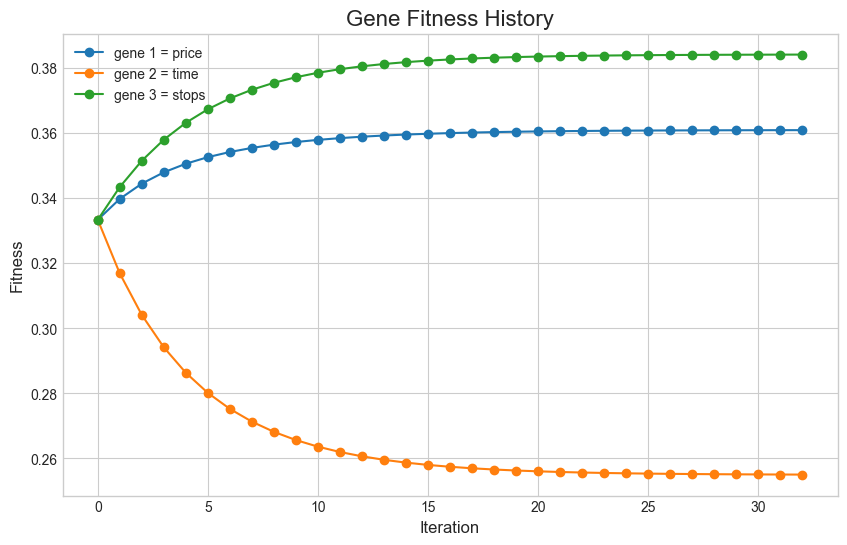

In [7]:
plotter = PikaiaPlotter(model)
_ = plotter.plot(
    plot_type=PlotType.GENE_FITNESS_HISTORY,
    show=True,
    gene_labels=gene_labels,
    org_labels=org_labels,
)

## 2. Example 2: 10x5 Data - Dominant Balance vs. Alternating Selection

Now, let's work with a larger 10x5 dataset. This will give us a better sense of how the strategies perform on more complex problems. The setup is similar to the previous example, but with more data and genes.

### 2.1. Data Processing


In [8]:
# Load and preprocess data
data_10x5_raw = np.array(
    [
        [300, 10, 2, 0, 2.5],
        [600, 5, 2, 1, 3.0],
        [1500, 4, 1, 2, 4.0],
        [400, 8, 2, 0, 3.5],
        [500, 8, 2, 1, 3.0],
        [700, 5, 2, 1, 4.5],
        [900, 6, 1, 1, 4.0],
        [1100, 6, 1, 2, 3.5],
        [1300, 5, 2, 2, 5.0],
        [1700, 4, 1, 2, 5.0],
    ]
)

# Define feature types: price (COST), time (COST), stops (COST), luggage (GAIN), rating (GAIN)
feature_types = [
    FeatureType.COST,
    FeatureType.COST,
    FeatureType.COST,
    FeatureType.GAIN,
    FeatureType.GAIN,
]
feature_transforms = [min_max_scaler] * 5
preprocessor = PikaiaPreprocessor(
    num_features=data_10x5_raw.shape[1],
    feature_types=feature_types,
    feature_transforms=feature_transforms,
)
data_10x5_scaled = preprocessor.fit_transform(data_10x5_raw)

# Create PikaiaPopulation
population10x5 = PikaiaPopulation(data_10x5_scaled)

# Define labels for plotting
gene_labels = [
    "gene 1 = price",
    "gene 2 = time",
    "gene 3 = stops",
    "gene 4 = luggage",
    "gene 5 = rating",
]
org_labels = [f"flight {i}" for i in range(population10x5.N)]

In [9]:
population_2 = population10x5
print("Number of organisms:", population_2.N)
print("Number of genes:", population_2.M)

Number of organisms: 10
Number of genes: 5


### 2.2. Model Setup and Fitting


In [10]:
gene_strategies = [
    GeneStrategyFactory.get_strategy(GeneStrategyEnum.DOMINANT),
]
org_strategies = [
    OrgStrategyFactory.get_strategy(OrgStrategyEnum.BALANCED),
    OrgStrategyFactory.get_strategy(OrgStrategyEnum.ALTRUISTIC, kin_range=16),
]
gene_mix_strategy = org_mix_strategy = MixStrategyFactory.get_strategy(
    MixStrategyEnum.FIXED
)

In [11]:
model = PikaiaModel(
    population=population_2,
    gene_strategies=gene_strategies,
    org_strategies=org_strategies,
    gene_mix_strategy=gene_mix_strategy,
    org_mix_strategy=org_mix_strategy,
    max_iter=32,
)
model.fit()

2025-11-13 13:39:03,407 - pikaia - INFO - Running simulation for up to 32 iterations.
2025-11-13 13:39:03,407 - pikaia - INFO - Starting evolutionary simulation for up to 32 iterations.
2025-11-13 13:39:03,414 - pikaia - INFO - Completed all 32 iterations without reaching ESE. Total time: 0.0066 seconds.
2025-11-13 13:39:03,414 - pikaia - INFO - Total fit process time: 0.0074 seconds.


### 2.3. Plotting Results


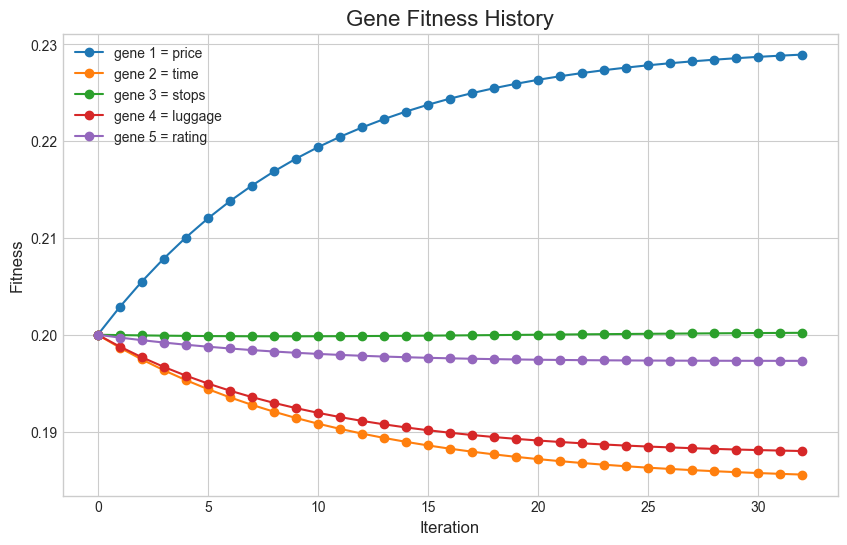

In [12]:
plotter = PikaiaPlotter(model)
_ = plotter.plot(
    plot_type=PlotType.GENE_FITNESS_HISTORY,
    show=True,
    gene_labels=gene_labels,
    org_labels=org_labels,
)

## 3. Example 3: Self-Consistency

This example demonstrates the concept of self-consistency, where we run the model multiple times and average the results to get a more stable and reliable outcome. We use the 10x5 dataset again for this purpose.

### 3.1. Data and Setup


In [13]:
population_3 = population10x5
print("Number of organisms:", population_3.N)
print("Number of genes:", population_3.M)

Number of organisms: 10
Number of genes: 5


### 3.2. Model Setup and Fitting


In [14]:
gene_strategies = [
    GeneStrategyFactory.get_strategy(GeneStrategyEnum.DOMINANT),
    GeneStrategyFactory.get_strategy(GeneStrategyEnum.ALTRUISTIC),
]
org_strategies = [
    OrgStrategyFactory.get_strategy(OrgStrategyEnum.BALANCED),
    OrgStrategyFactory.get_strategy(OrgStrategyEnum.ALTRUISTIC, kin_range=5),
]
gene_mix_strategy = org_mix_strategy = MixStrategyFactory.get_strategy(
    MixStrategyEnum.SELF_CONSISTENT
)

In [15]:
model = PikaiaModel(
    population=population_3,
    gene_strategies=gene_strategies,
    org_strategies=org_strategies,
    gene_mix_strategy=gene_mix_strategy,
    org_mix_strategy=org_mix_strategy,
    max_iter=32,
)
model.fit()

2025-11-13 13:39:03,509 - pikaia - INFO - Running simulation for up to 32 iterations.
2025-11-13 13:39:03,509 - pikaia - INFO - Starting evolutionary simulation for up to 32 iterations.
2025-11-13 13:39:03,535 - pikaia - INFO - Completed all 32 iterations without reaching ESE. Total time: 0.0252 seconds.
2025-11-13 13:39:03,535 - pikaia - INFO - Total fit process time: 0.0262 seconds.


### 3.3. Plotting Results


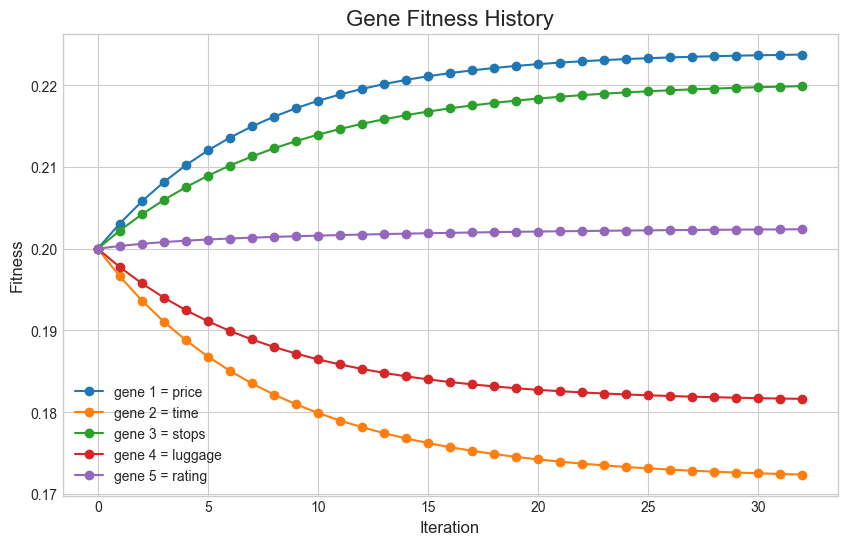

In [16]:
plotter = PikaiaPlotter(model)
_ = plotter.plot(
    plot_type=PlotType.GENE_FITNESS_HISTORY,
    show=True,
    gene_labels=gene_labels,
    org_labels=org_labels,
)

## 4. Example 4: Search with Movie Data

In this final example, we'll use a real-world dataset of movie ratings. The goal is to find the best movies based on a set of criteria. This demonstrates how Pikaia can be applied to search and recommendation problems.

### 4.1. Data Processing


In [17]:
movie_df = pd.read_csv("data/movie_matrix.csv")

# Preprocess data
gene_labels = movie_df.iloc[0, :].tolist()
org_labels = movie_df.iloc[:, 0].tolist()
movie_raw = movie_df.iloc[:, 1:].values

# Shuffle rows and columns and select a subset of features for quicker execution
movie_raw = movie_raw[:, :16]

# Define feature types: all movie features default to GAIN
feature_types = [FeatureType.GAIN] * 16
feature_transforms = [min_max_scaler] * 16
preprocessor = PikaiaPreprocessor(
    num_features=16, feature_types=feature_types, feature_transforms=feature_transforms
)
movie_scaled = preprocessor.fit_transform(movie_raw)

# Create PikaiaPopulation
population_movie = PikaiaPopulation(movie_scaled)

In [18]:
population_4 = population_movie
print("Number of organisms:", population_4.N)
print("Number of genes:", population_4.M)

Number of organisms: 869
Number of genes: 16


### 4.2. Model Setup and Fitting


In [19]:
gene_strategies = [
    GeneStrategyFactory.get_strategy(GeneStrategyEnum.DOMINANT),
    GeneStrategyFactory.get_strategy(GeneStrategyEnum.ALTRUISTIC),
]
org_strategies = [
    OrgStrategyFactory.get_strategy(OrgStrategyEnum.BALANCED),
    OrgStrategyFactory.get_strategy(OrgStrategyEnum.ALTRUISTIC, kin_range=16),
]
gene_mix_strategy = org_mix_strategy = MixStrategyFactory.get_strategy(
    MixStrategyEnum.SELF_CONSISTENT
)

**Warning**: Data size is large; fitting may take a while.

In [20]:
model = PikaiaModel(
    population=population_4,
    gene_strategies=gene_strategies,
    org_strategies=org_strategies,
    gene_mix_strategy=gene_mix_strategy,
    org_mix_strategy=org_mix_strategy,
    max_iter=16,
)
model.fit()

2025-11-13 13:39:03,675 - pikaia - INFO - Running simulation for up to 16 iterations.
2025-11-13 13:39:03,675 - pikaia - INFO - Starting evolutionary simulation for up to 16 iterations.
2025-11-13 13:39:05,516 - pikaia - INFO - Completed all 16 iterations without reaching ESE. Total time: 1.8400 seconds.
2025-11-13 13:39:05,516 - pikaia - INFO - Total fit process time: 1.8409 seconds.


### 4.3. Plotting and Results


In [21]:
plotter = PikaiaPlotter(model)
_ = plotter.plot(
    plot_type=PlotType.GENE_FITNESS_HISTORY,
    show=True,
    gene_labels=gene_labels,
    org_labels=org_labels,
)

In [22]:
sorted_indices = np.argsort(model.organism_fitness_history[-1, :])[::-1]

print("Top 5 Movies:")
for i in range(5):
    print(
        f"{i + 1}. "
        f"{org_labels[sorted_indices[i]]} "
        f"(Fitness: {model.organism_fitness_history[-1, sorted_indices[i]]:.4f})"
    )

Top 5 Movies:
1. E.T. the Extra-Terrestrial (Fitness: 0.8228)
2. The Goonies (Fitness: 0.5380)
3. Finding Nemo (Fitness: 0.5120)
4. The Blob (Fitness: 0.4931)
5. Annie (Fitness: 0.4835)


## 5. Example 5: 3x3 Data - Single Point Prediction

This example uses the small 3x3 dataset. We'll run the genetic algorithm to predict the optimal fitness in one go.

### 5.1. Data Processing


In [23]:
# Define labels for plotting
gene_labels = ["gene 1 = price", "gene 2 = time", "gene 3 = stops"]
org_labels = [f"flight {i}" for i in range(population3x3.N)]

In [24]:
population_5 = population3x3

### 5.2. Model Setup and Fitting


In [25]:
gene_strategies = [
    GeneStrategyFactory.get_strategy(GeneStrategyEnum.DOMINANT),
    GeneStrategyFactory.get_strategy(GeneStrategyEnum.ALTRUISTIC),
]
org_strategies = [
    OrgStrategyFactory.get_strategy(OrgStrategyEnum.BALANCED),
    OrgStrategyFactory.get_strategy(OrgStrategyEnum.SELFISH),
]
gene_mix_strategy = org_mix_strategy = MixStrategyFactory.get_strategy(
    MixStrategyEnum.FIXED
)

In [26]:
model = PikaiaModel(
    population=population_5,
)
model.fit()

2025-11-13 13:39:05,647 - pikaia - INFO - No max iterations set, solving for optimal solution directly.
2025-11-13 13:39:05,647 - pikaia - INFO - Total fit process time: 0.0006 seconds.


### 5.3. Plotting Results


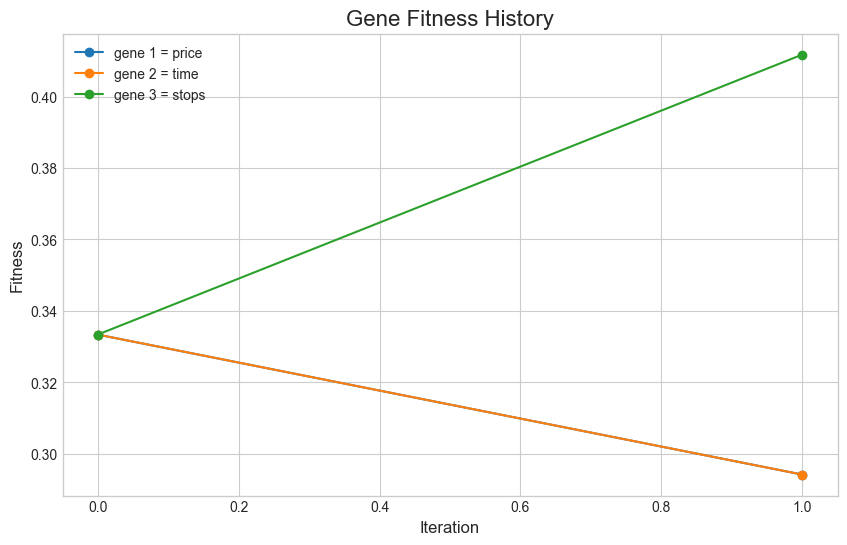

In [27]:
plotter = PikaiaPlotter(model)
_ = plotter.plot(
    plot_type=PlotType.GENE_FITNESS_HISTORY,
    show=True,
    gene_labels=gene_labels,
    org_labels=org_labels,
)

## Example 6: Time to Reach 8 Iterations vs. Number of Features

This example benchmarks how the time to reach 8 iterations in the genetic model depends on the number of features (genes) in the population. We test for 16, 32, 64, 128, and 256 features, and plot the results.


### 6.1. Data Processing

In [28]:
movie_df = pd.read_csv("data/movie_matrix.csv")

# Preprocess data
gene_labels = movie_df.iloc[0, :].tolist()
org_labels = movie_df.iloc[:, 0].tolist()
movie_raw = movie_df.iloc[:, 1:].values

# Define feature types: all movie features default to GAIN
num_features_full = movie_raw.shape[1]
feature_types = [FeatureType.GAIN] * num_features_full
feature_transforms = [min_max_scaler] * num_features_full
preprocessor = PikaiaPreprocessor(
    num_features=num_features_full,
    feature_types=feature_types,
    feature_transforms=feature_transforms,
)
movie_scaled = preprocessor.fit_transform(movie_raw)

### 6.2. Model Setup and Fitting


In [29]:
gene_strategies = [
    GeneStrategyFactory.get_strategy(GeneStrategyEnum.DOMINANT),
    GeneStrategyFactory.get_strategy(GeneStrategyEnum.ALTRUISTIC),
]
org_strategies = [
    OrgStrategyFactory.get_strategy(OrgStrategyEnum.BALANCED),
    OrgStrategyFactory.get_strategy(OrgStrategyEnum.ALTRUISTIC, kin_range=16),
]
gene_mix_strategy = org_mix_strategy = MixStrategyFactory.get_strategy(
    MixStrategyEnum.SELF_CONSISTENT
)

**Warning**: Data size is large; fitting may take a while.

In [30]:
times = []
max_iter = 5
features_list = [16, 32, 64, 128, 256, 512]
for n_features in features_list:
    model = PikaiaModel(
        population=PikaiaPopulation(movie_scaled[:, :n_features]),
        gene_strategies=gene_strategies,
        org_strategies=org_strategies,
        gene_mix_strategy=gene_mix_strategy,
        org_mix_strategy=org_mix_strategy,
        max_iter=max_iter,
        epsilon=None,
    )

    start = time.perf_counter()
    model.fit()
    elapsed = time.perf_counter() - start
    times.append(elapsed)
    print(f"Features: {n_features}, Time: {elapsed:.4f} s")

2025-11-13 13:39:05,781 - pikaia - INFO - Running simulation for up to 5 iterations.
2025-11-13 13:39:05,781 - pikaia - INFO - Starting evolutionary simulation for up to 5 iterations.
2025-11-13 13:39:06,369 - pikaia - INFO - Completed all 5 iterations without reaching ESE. Total time: 0.5876 seconds.
2025-11-13 13:39:06,369 - pikaia - INFO - Total fit process time: 0.5886 seconds.
Features: 16, Time: 0.5888 s
2025-11-13 13:39:06,411 - pikaia - INFO - Running simulation for up to 5 iterations.
2025-11-13 13:39:06,411 - pikaia - INFO - Starting evolutionary simulation for up to 5 iterations.
2025-11-13 13:39:07,424 - pikaia - INFO - Completed all 5 iterations without reaching ESE. Total time: 1.0121 seconds.
2025-11-13 13:39:07,424 - pikaia - INFO - Total fit process time: 1.0129 seconds.
Features: 32, Time: 1.0131 s
2025-11-13 13:39:07,510 - pikaia - INFO - Running simulation for up to 5 iterations.
2025-11-13 13:39:07,511 - pikaia - INFO - Starting evolutionary simulation for up to 5 

### 6.3. Plotting Results


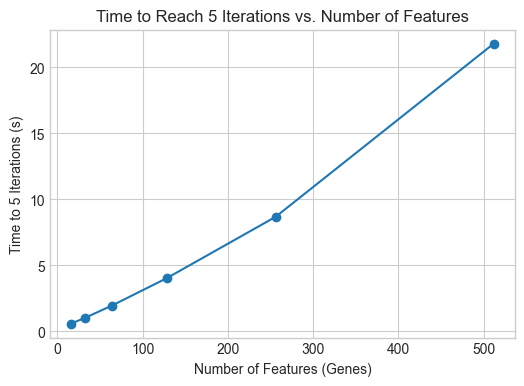

In [31]:
plt.figure(figsize=(6, 4))
plt.plot(features_list, times, marker="o")
plt.xlabel("Number of Features (Genes)")
plt.ylabel(f"Time to {max_iter} Iterations (s)")
plt.title(f"Time to Reach {max_iter} Iterations vs. Number of Features")
plt.grid(True)
plt.show()